## Omdena Liverpool Chapter: Vehicle Analysis 


## Problem Statement:

- In-depth analysis of vehicles involved in collisions

## In-depth Analysis of vehicles involved in collisions

## Data Overview:
- The data comes from the Open Data website of the UK government, where they have been published by the Department of Transport.

- Initially, the vehicle dataset had been cleaned by removing null values with simple imputations.

## Provided dataset:
- simple_impute_vehicle_data.parquet: Every instance of records in the file represents the involvement of a unique vehicle in a unique traffic accident, featuring various vehicle and passenger properties as columns.

- The records were collected between 2004-2016 AD. and consists of ~2.0 million records.

## Objectives of Exploratory Data Analysis:
- Structure investigation: Explore the dataset size and features datatypes.
- Quality investigation: Explore if duplicates, missing values and unwanted entries exists.
- Content investigation: Perform analysis of features mutual depedence or correlations along with discovering the data distribution and data outliers.
- Ask bussiness problem related question and discover answers from data by analyzing them.

In [ ]:
!pip install fastparquet
!pip install -q datascience
!pip install -q pandas-profiling

In [ ]:
!pip install -q --upgrade pandas-profiling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from pandas_profiling import ProfileReport
from scipy.stats import chi2_contingency
pd.set_option('display.max_columns',None)
import warnings                                                    
warnings.filterwarnings("ignore")  

In [2]:
df = pd.read_parquet('C://Users/Administrator/Desktop/INSAID/Omdena Liverpool Chapter RTC/vehicle_data_no_impute.parquet')
print('Shape of df : ', df.shape)


Shape of df :  (2172630, 38)


In [3]:
df.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year,Age_Band_of_Driver_missing,Age_of_Vehicle_missing,Driver_Home_Area_Type_missing,Driver_IMD_Decile_missing,Engine_Capacity_.CC._missing,Hit_Object_in_Carriageway_missing,Hit_Object_off_Carriageway_missing,Journey_Purpose_of_Driver_missing,Junction_Location_missing,make_missing,model_missing,Propulsion_Code_missing,Skidding_and_Overturning_missing,Was_Vehicle_Left_Hand_Drive_missing
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,None,None,None,None,ROVER,45 CLASSIC 16V,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,None,Front,2004,False,False,False,False,False,True,True,True,True,False,False,False,True,True
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,None,None,None,None,BMW,C1,None,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,None,Front,2004,False,True,False,False,True,True,True,True,True,False,False,True,True,True
2,200401BS00003,26 - 35,4.0,None,NaN,998.0,None,None,None,None,NISSAN,MICRA CELEBRATION 16V,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,None,Front,2004,False,False,True,True,False,True,True,True,True,False,False,False,True,True
3,200401BS00003,66 - 75,NaN,None,NaN,NaN,None,None,None,None,LONDON TAXIS INT,TXII GOLD AUTO,None,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,None,Front,2004,False,True,True,True,True,True,True,True,True,False,False,True,True,True
4,200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,None,None,None,None,PIAGGIO,VESPA ET4,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,None,Front,2004,False,False,False,False,False,True,True,True,True,False,False,False,True,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172630 entries, 0 to 2177204
Data columns (total 38 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Accident_Index                       object 
 1   Age_Band_of_Driver                   object 
 2   Age_of_Vehicle                       float64
 3   Driver_Home_Area_Type                object 
 4   Driver_IMD_Decile                    float64
 5   Engine_Capacity_.CC.                 float64
 6   Hit_Object_in_Carriageway            object 
 7   Hit_Object_off_Carriageway           object 
 8   Journey_Purpose_of_Driver            object 
 9   Junction_Location                    object 
 10  make                                 object 
 11  model                                object 
 12  Propulsion_Code                      object 
 13  Sex_of_Driver                        object 
 14  Skidding_and_Overturning             object 
 15  Towing_and_Articulation         

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age_of_Vehicle,1816345.0,7.108259,4.725891,1.0,3.0,7.0,10.0,111.0
Driver_IMD_Decile,1440351.0,5.388131,2.821855,1.0,3.0,5.0,8.0,10.0
Engine_Capacity_.CC.,1908520.0,2042.155992,1950.094015,1.0,1299.0,1598.0,1997.0,96000.0
Vehicle_Location.Restricted_Lane,2172630.0,0.107239,0.879752,0.0,0.0,0.0,0.0,9.0
Vehicle_Reference,2172630.0,1.553513,0.775348,1.0,1.0,1.0,2.0,91.0
Year,2172630.0,2010.933169,3.689340,2004.0,2008.0,2011.0,2014.0,2016.0


In [6]:
df.isnull().sum()/df.shape[0]*100

Accident_Index                          0.000000
Age_Band_of_Driver                      7.804090
Age_of_Vehicle                         16.398789
Driver_Home_Area_Type                  15.297497
Driver_IMD_Decile                      33.704727
Engine_Capacity_.CC.                   12.156235
Hit_Object_in_Carriageway              95.950392
Hit_Object_off_Carriageway             91.398996
Journey_Purpose_of_Driver               6.073745
Junction_Location                       5.537712
make                                    5.037995
model                                  14.890202
Propulsion_Code                        11.237118
Sex_of_Driver                           0.000000
Skidding_and_Overturning               87.213055
Towing_and_Articulation                 0.000000
Vehicle_Leaving_Carriageway             0.000000
Vehicle_Location.Restricted_Lane        0.000000
Vehicle_Manoeuvre                       0.000000
Vehicle_Reference                       0.000000
Vehicle_Type        

In [7]:
# profile = ProfileReport(df = df)
# profile.to_file(output_file = 'Pre Profiling Report_Vehicle data.html' )
# print('Accomplished!')

In [8]:
# import missingno as msno

# msno.matrix(df_new)
# plt.show()


Observations : WE can see the dataset have 2172630 observations with 38 features . 
               Missing values are present in dataset and in some coulmns is it more than 80% of missing values , those columns we need to drop from dataset. 

In [9]:
j = []
for i in df.columns:
    if (df[i].isnull().sum()/df.shape[0])<0.05:
        j.append(i)

In [10]:
df.dropna(axis=0, subset=j, how='any',inplace=True)

In [11]:
df_new = df.drop(['Hit_Object_off_Carriageway','Hit_Object_in_Carriageway','Skidding_and_Overturning'], axis =1)

In [12]:
for i in df_new.columns:
    if df_new[i].dtype == 'O':
        mode = df_new[i].mode()
        df_new[i] = df_new[i].replace(np.NaN , mode.values[0])
    else:
        median = df_new[i].median()
        df_new[i] = df_new[i].replace(np.NaN , median)


In [13]:
df_new.isnull().sum()/df_new.shape[0]*100

Accident_Index                         0.0
Age_Band_of_Driver                     0.0
Age_of_Vehicle                         0.0
Driver_Home_Area_Type                  0.0
Driver_IMD_Decile                      0.0
Engine_Capacity_.CC.                   0.0
Journey_Purpose_of_Driver              0.0
Junction_Location                      0.0
make                                   0.0
model                                  0.0
Propulsion_Code                        0.0
Sex_of_Driver                          0.0
Towing_and_Articulation                0.0
Vehicle_Leaving_Carriageway            0.0
Vehicle_Location.Restricted_Lane       0.0
Vehicle_Manoeuvre                      0.0
Vehicle_Reference                      0.0
Vehicle_Type                           0.0
Was_Vehicle_Left_Hand_Drive            0.0
X1st_Point_of_Impact                   0.0
Year                                   0.0
Age_Band_of_Driver_missing             0.0
Age_of_Vehicle_missing                 0.0
Driver_Home

In [14]:
df_new.shape

(2172630, 35)

<AxesSubplot:>

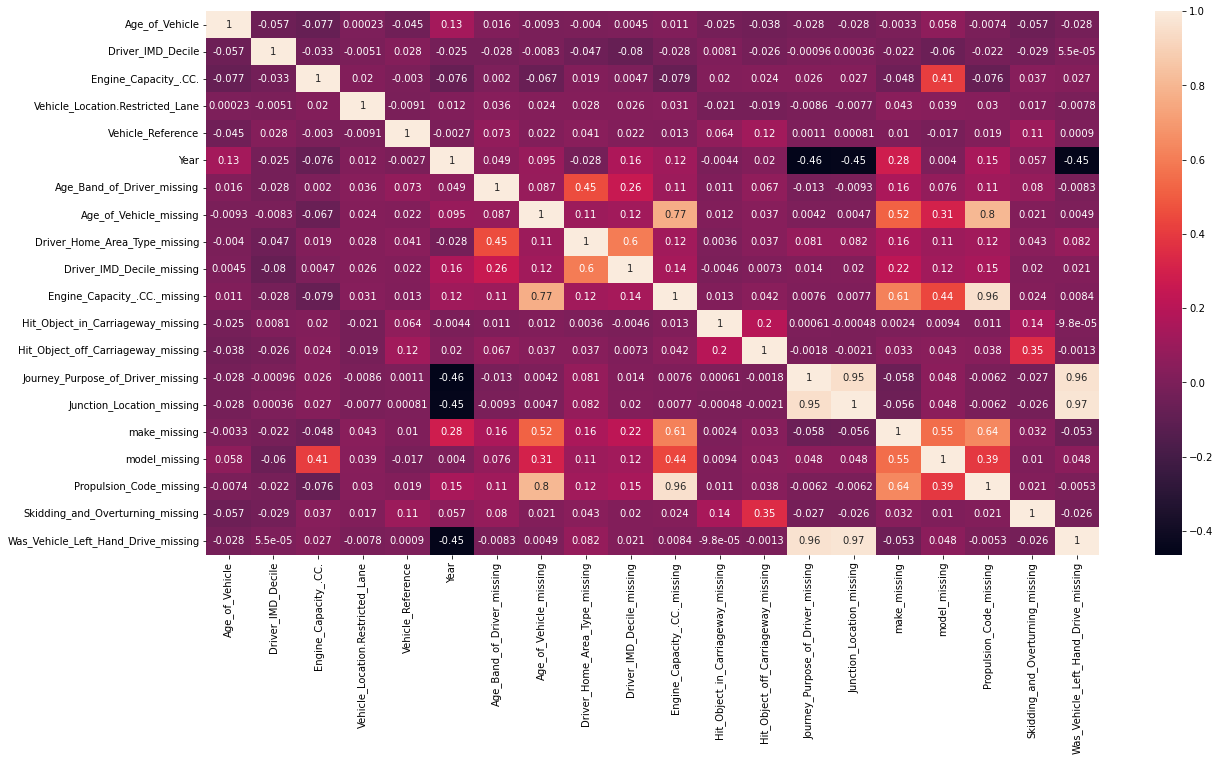

In [15]:
fig = plt.figure(figsize= [20,10])
sns.heatmap(df_new.corr(), annot = True)

In [16]:
print("Total duplicates: ", df_new.duplicated().sum())

Total duplicates:  0


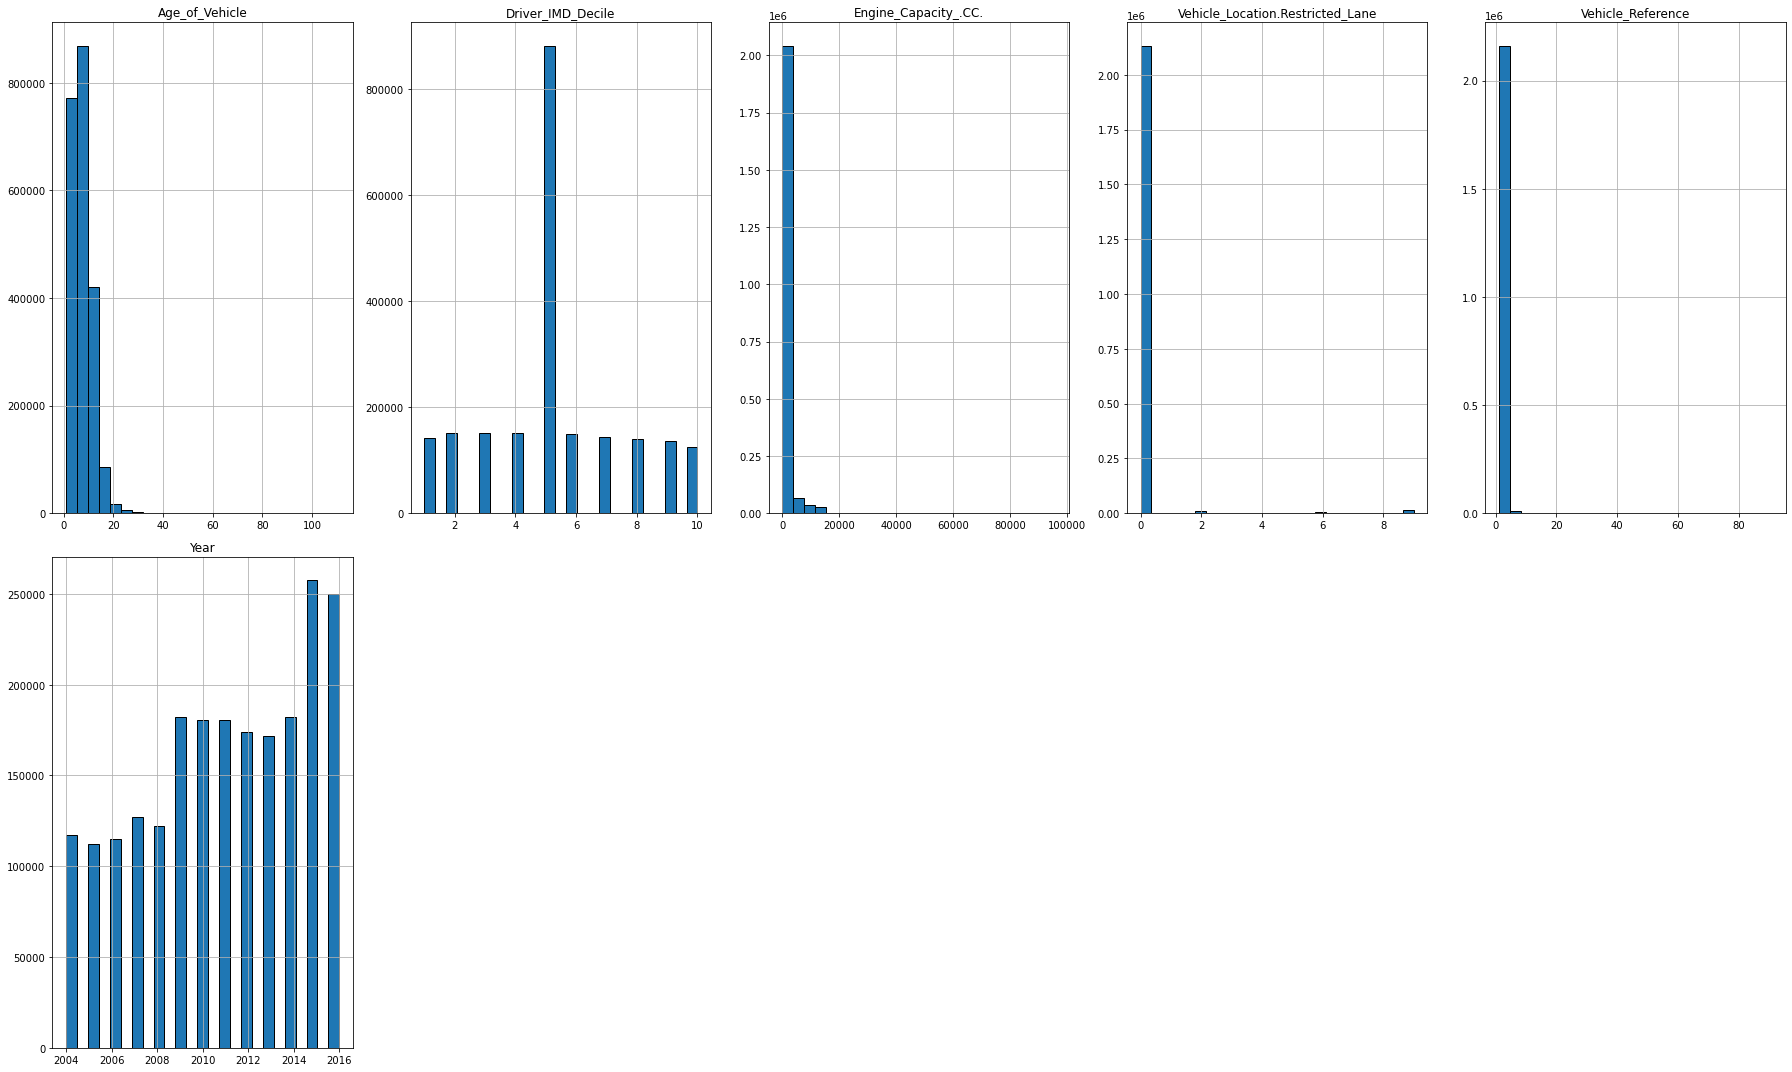

In [17]:
df_new.hist(bins =25 , figsize = [25,15] , layout = (-1,5) ,edgecolor="black")
plt.tight_layout()

We can consider to remove some features which are not much important to analysis .


In [18]:
drop_col = ["Vehicle_Location.Restricted_Lane",
    "Vehicle_Reference",
    "Driver_IMD_Decile",
    "Was_Vehicle_Left_Hand_Drive",
    "Towing_and_Articulation",
    ]
df_new.drop(columns=drop_col, inplace=True)

In [19]:
df_new.replace({False:0,True:1}, inplace = True)

In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172630 entries, 0 to 2177204
Data columns (total 30 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Accident_Index                       object 
 1   Age_Band_of_Driver                   object 
 2   Age_of_Vehicle                       float64
 3   Driver_Home_Area_Type                object 
 4   Engine_Capacity_.CC.                 float64
 5   Journey_Purpose_of_Driver            object 
 6   Junction_Location                    object 
 7   make                                 object 
 8   model                                object 
 9   Propulsion_Code                      object 
 10  Sex_of_Driver                        object 
 11  Vehicle_Leaving_Carriageway          object 
 12  Vehicle_Manoeuvre                    object 
 13  Vehicle_Type                         object 
 14  X1st_Point_of_Impact                 object 
 15  Year                            

In [21]:
df_new.columns

Index(['Accident_Index', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Engine_Capacity_.CC.',
       'Journey_Purpose_of_Driver', 'Junction_Location', 'make', 'model',
       'Propulsion_Code', 'Sex_of_Driver', 'Vehicle_Leaving_Carriageway',
       'Vehicle_Manoeuvre', 'Vehicle_Type', 'X1st_Point_of_Impact', 'Year',
       'Age_Band_of_Driver_missing', 'Age_of_Vehicle_missing',
       'Driver_Home_Area_Type_missing', 'Driver_IMD_Decile_missing',
       'Engine_Capacity_.CC._missing', 'Hit_Object_in_Carriageway_missing',
       'Hit_Object_off_Carriageway_missing',
       'Journey_Purpose_of_Driver_missing', 'Junction_Location_missing',
       'make_missing', 'model_missing', 'Propulsion_Code_missing',
       'Skidding_and_Overturning_missing',
       'Was_Vehicle_Left_Hand_Drive_missing'],
      dtype='object')

### Distribution of Accidents by Year

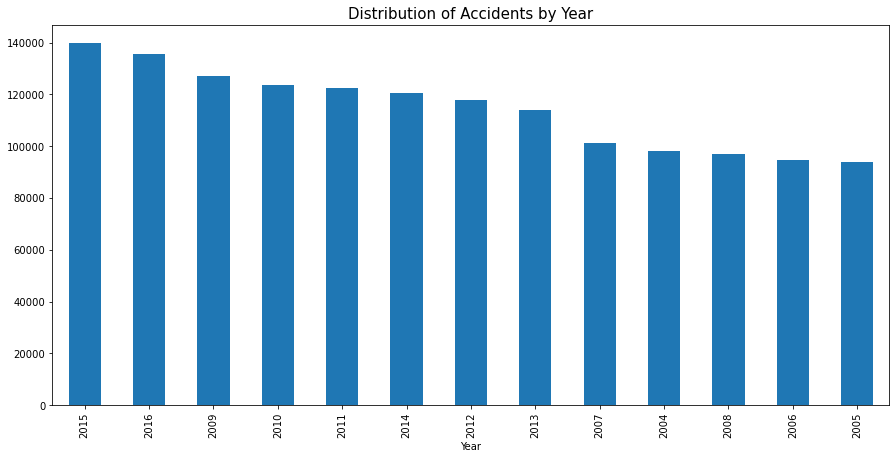

In [22]:
fig = plt.figure(figsize = [15,7])
df_new.groupby(['Year'])['Accident_Index'].nunique().sort_values(ascending = False).plot(kind='bar')
plt.title("Distribution of Accidents by Year", size=15)
plt.show()

Observations:
- We can see that number of vehicles involved in accidents is continuously rising each year.

### Distribution of accidents by vehicle type

In [23]:
df_new.groupby(['Vehicle_Type'])['Accident_Index'].nunique().sort_values(ascending = False)

Vehicle_Type
Car                                      1126378
Van / Goods 3.5 tonnes mgw or under       112279
Bus or coach (17 or more pass seats)       75683
109                                        71389
Motorcycle over 500cc                      70152
Motorcycle 125cc and under                 61008
Goods 7.5 tonnes mgw and over              52320
Taxi/Private hire car                      42663
Pedal cycle                                38058
Motorcycle 50cc and under                  22179
Motorcycle over 125cc and up to 500cc      20776
Goods over 3.5t. and under 7.5t            17877
Other vehicle                              13595
106                                         7331
Agricultural vehicle                        5957
Minibus (8 - 16 passenger seats)            5860
Goods vehicle - unknown weight              1794
108                                         1300
Motorcycle - unknown cc                      719
Mobility scooter                             496
Ridden 

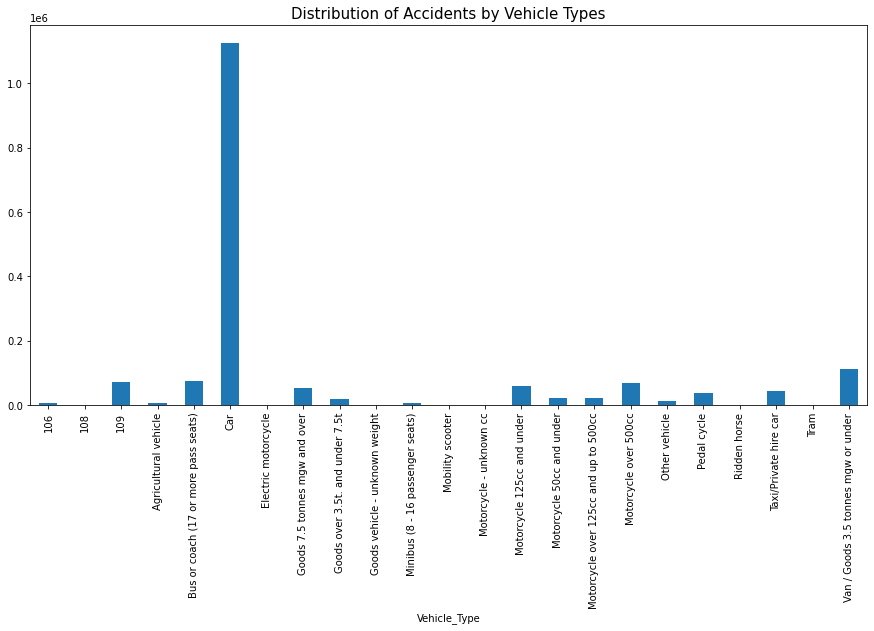

In [24]:
fig = plt.figure(figsize = [15,7])
df_new.groupby(['Vehicle_Type'])['Accident_Index'].nunique().plot(kind = 'bar')
plt.title("Distribution of Accidents by Vehicle Types", size=15)
plt.show()

From above plot we can observe that most of the accidents happened by Car . 

### Age of the Vehicle 

<AxesSubplot:>

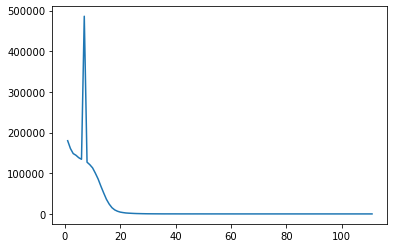

In [25]:
df_new['Age_of_Vehicle'].value_counts().sort_index(ascending = False).plot()


### Distribution of driver Gender 

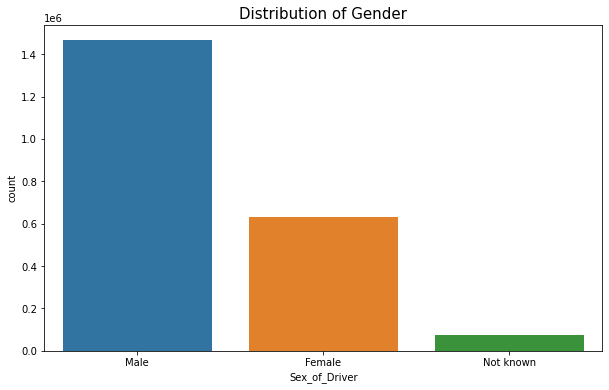

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(df_new["Sex_of_Driver"])
plt.title("Distribution of Gender", size=15)
plt.show()

we can see from the above plot that more number of male drivers are involed in accident. 

### Distribution of Age group of driver among gender

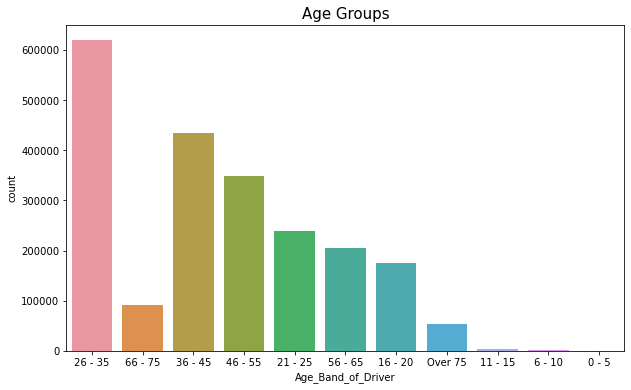

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(df_new["Age_Band_of_Driver"])
plt.title("Age Groups", size=15)
plt.show()

In [28]:
df1 = pd.DataFrame(df_new.groupby(['Age_Band_of_Driver','Sex_of_Driver'])['Accident_Index'].nunique())
df1.reset_index(level = [0,1] , inplace = True)
df1

,Age_Band_of_Driver,Sex_of_Driver,Accident_Index
0,0 - 5,Female,27
1,0 - 5,Male,92
2,0 - 5,Not known,2
3,11 - 15,Female,395
4,11 - 15,Male,3214
5,11 - 15,Not known,2
6,16 - 20,Female,52663
7,16 - 20,Male,119306
8,16 - 20,Not known,416
9,21 - 25,Female,78330


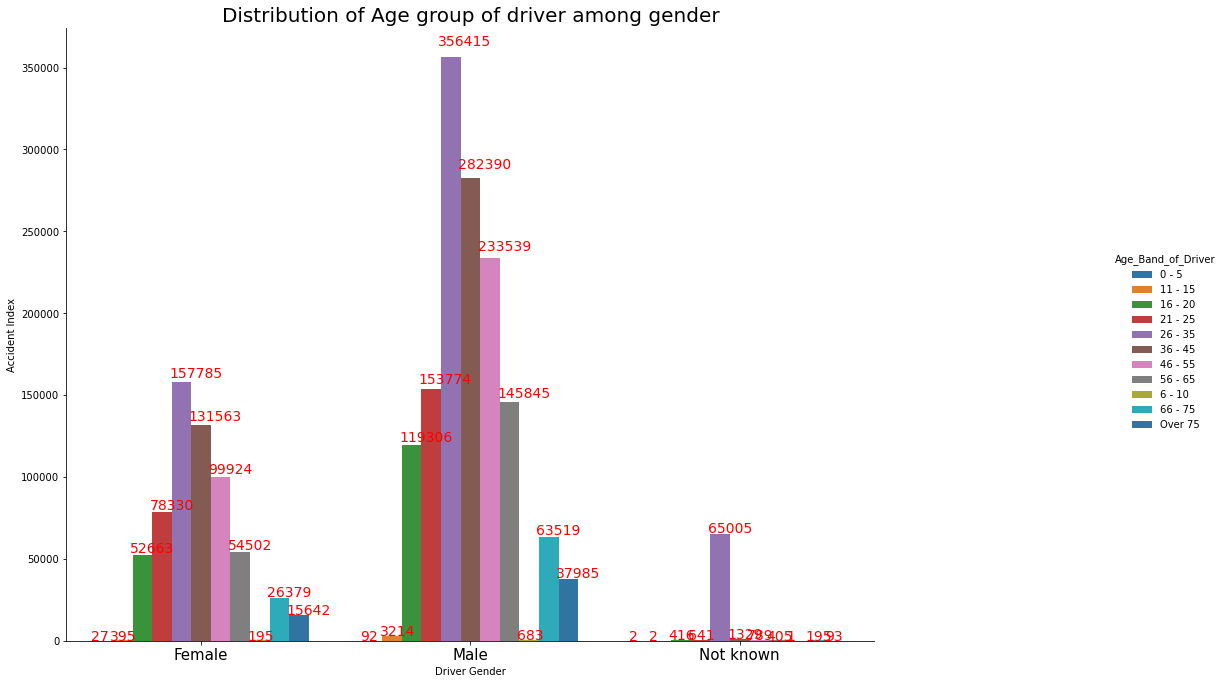

In [29]:
graph = sns.catplot(x='Sex_of_Driver', y='Accident_Index', hue='Age_Band_of_Driver', data=df1,kind='bar',palette='tab10')

ax = graph.facet_axis(0, 0)

# iterate through the axes containers
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{}'.format(int(p.get_height())),   #Used to format it K representation
            color='red', 
            rotation='horizontal', 
            size=14)
    
graph.set_axis_labels("Driver Gender","Accident Index")
graph.set_xticklabels(fontsize=15,rotation=0)
graph.fig.set_figwidth(20)
graph.fig.set_figheight(10)

plt.title("Distribution of Age group of driver among gender",fontsize=20)
plt.show()

Observations:
- Most of the drivers involeved in accident are from age group of 26 to 35 years and most of them are male .

### Direction of most of the vehicles during accident

In [30]:
df_new['Vehicle_Manoeuvre'].value_counts()

Going ahead other                      992959
Turning right                          215894
Slowing or stopping                    177399
Waiting to go - held up                155444
Going ahead right-hand bend             90829
Parked                                  88219
Moving off                              87165
Going ahead left-hand bend              78613
Turning left                            70031
Overtaking moving vehicle - offside     43688
Waiting to turn right                   36702
Reversing                               30364
Overtaking static vehicle - offside     26421
Changing lane to left                   19123
Changing lane to right                  18865
U-turn                                  17176
Waiting to turn left                    12486
Overtaking - nearside                   11252
Name: Vehicle_Manoeuvre, dtype: int64

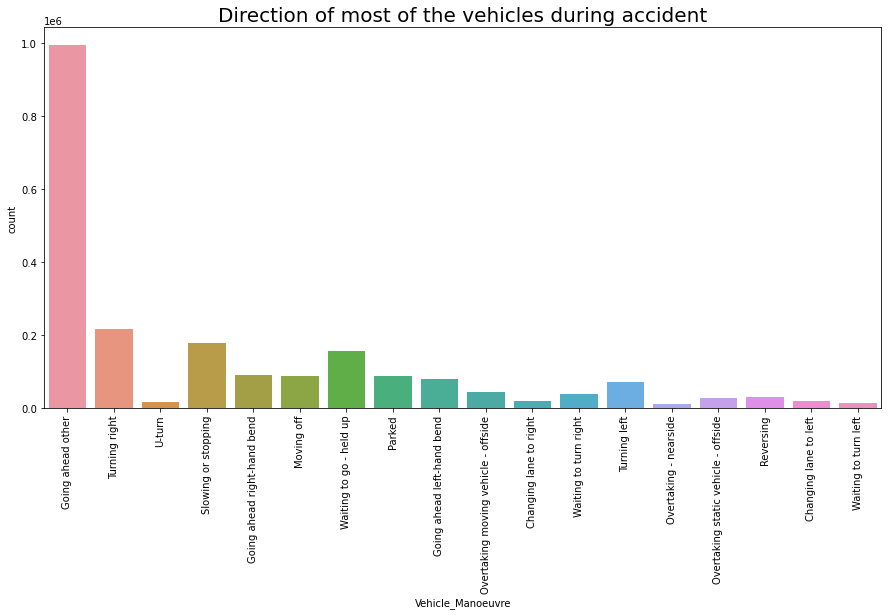

In [31]:
fig = plt.figure(figsize = [15,7])
sns.countplot(x = df_new['Vehicle_Manoeuvre'])
plt.title("Direction of most of the vehicles during accident",fontsize=20)
plt.xticks(rotation = 90)
plt.show()

### Distribution of Top 10 Vehicle company by Accident Index

In [32]:
df2=pd.DataFrame(df_new.groupby(['make'])['Accident_Index'].count().sort_values(ascending = False).head(10))
df2.reset_index(level =[0] , inplace = True)
df2

,make,Accident_Index
0,VAUXHALL,348815
1,FORD,236765
2,PEUGEOT,126378
3,VOLKSWAGEN,120648
4,RENAULT,114141
5,HONDA,102938
6,MERCEDES,89692
7,TOYOTA,83457
8,CITROEN,81692
9,NISSAN,71150


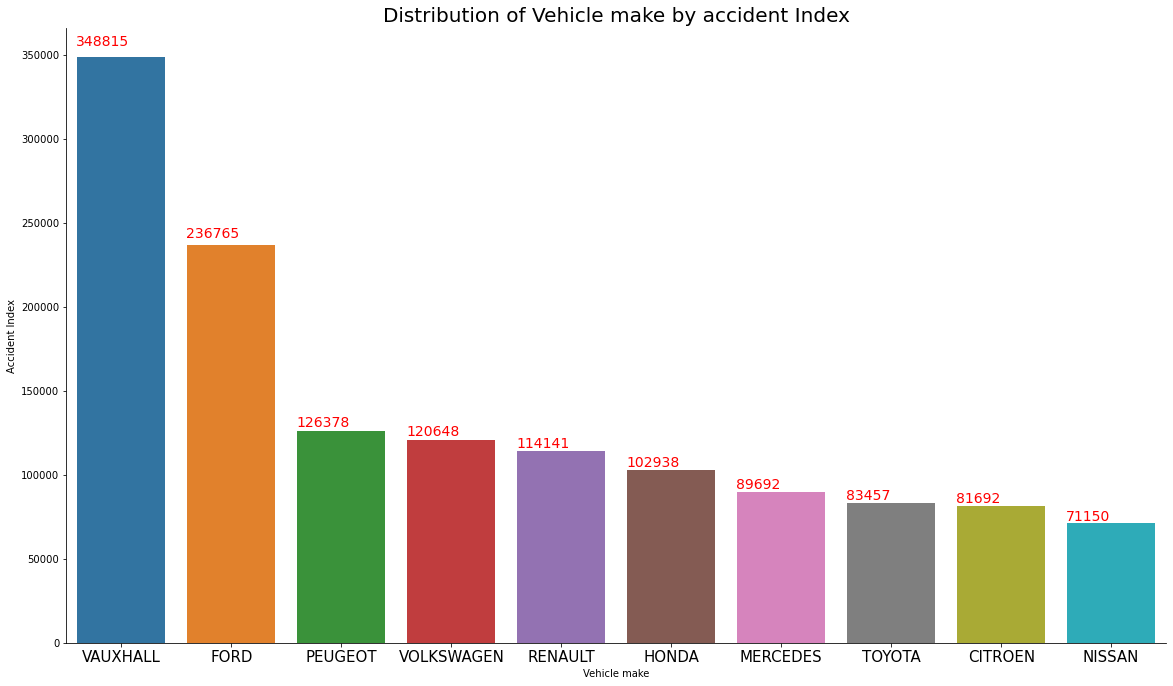

In [33]:
graph = sns.catplot(x='make', y='Accident_Index', data=df2,kind='bar',palette='tab10')

ax = graph.facet_axis(0, 0)

# iterate through the axes containers
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{}'.format(int(p.get_height())),   #Used to format it K representation
            color='red', 
            rotation='horizontal', 
            size=14)
    
graph.set_axis_labels("Vehicle make","Accident Index")
graph.set_xticklabels(fontsize=15,rotation=0)
graph.fig.set_figwidth(20)
graph.fig.set_figheight(10)

plt.title("Distribution of Vehicle make by accident Index",fontsize=20)
plt.show()

Observations:
- around 40% of vehicles involed in accidents are of VAUXHALL,FORD and PEUGEOT followed by Renault ,PEUGEOT,VOLKSWAGEN.

### Distribution of Top 10 Vehicle Model by Accident Index 

In [34]:
df_model = pd.DataFrame(df_new.groupby(['model'])['Accident_Index'].nunique().sort_values(ascending = False)[1:10])
df_model.reset_index(level = [0] , inplace = True)
df_model

,model,Accident_Index
0,CLIO DYNAMIQUE 16V,8156
1,PUNTO ACTIVE,5330
2,TRANSIT 350 LWB TD,4496
3,KA,4469
4,206 LX,4245
5,PUNTO ACTIVE 8V,4108
6,SPRINTER 313 CDI,3756
7,206 LOOK,3344
8,KA STYLE,3340


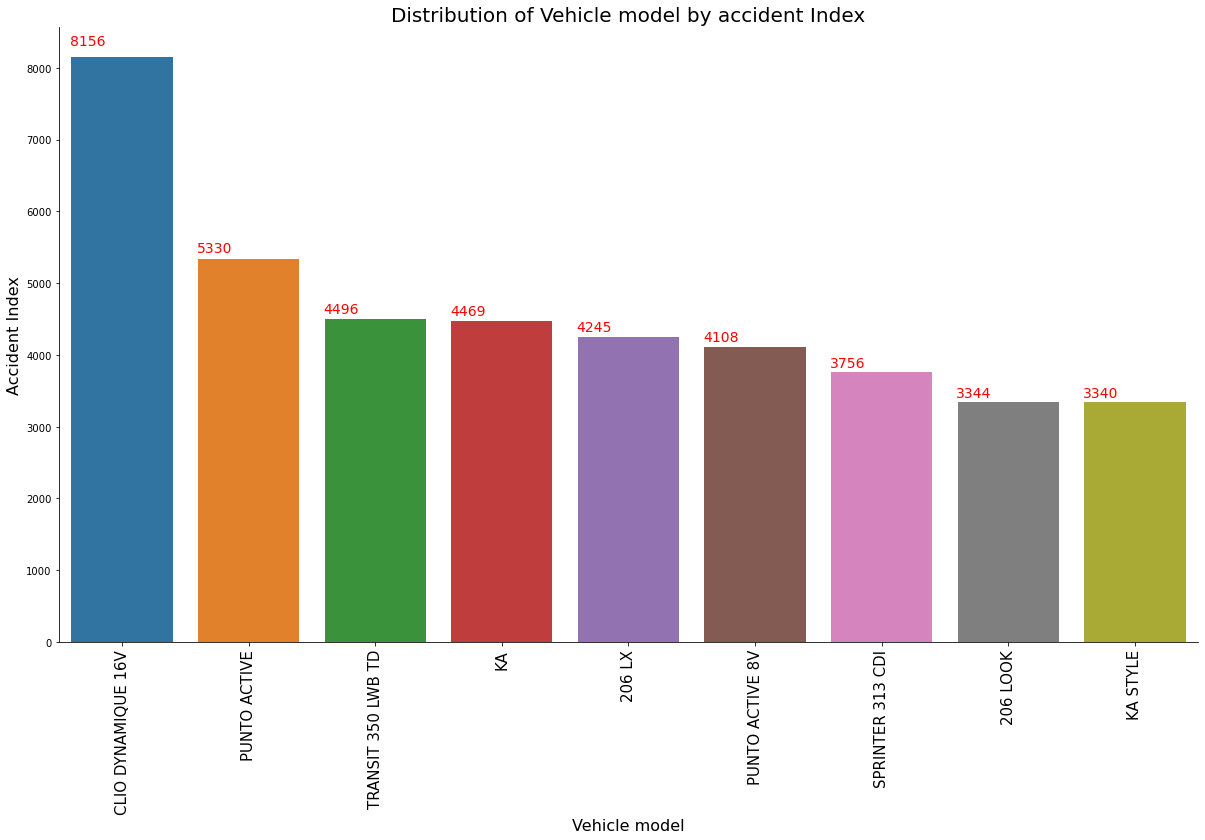

In [35]:
graph = sns.catplot(x='model', y='Accident_Index', data=df_model,kind='bar',palette='tab10')

ax = graph.facet_axis(0, 0)

# iterate through the axes containers
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{}'.format(int(p.get_height())),   #Used to format it K representation
            color='red', 
            rotation='horizontal', 
            size=14)
    
graph.set_axis_labels("Vehicle model","Accident Index", fontsize = 16)
graph.set_xticklabels(fontsize=15,rotation=90)
graph.fig.set_figwidth(20)
graph.fig.set_figheight(10)

plt.title("Distribution of Vehicle model by accident Index",fontsize=20)
plt.show()

### Vehicle Fuel Type 

In [36]:
df_new['Propulsion_Code'].value_counts()

Petrol                 1385450
Heavy oil               774786
Hybrid electric           9137
Gas/Bi-fuel               1640
Petrol/Gas (LPG)           663
Electric                   615
Gas                        174
Electric diesel            143
New fuel technology         11
Gas Diesel                   7
Steam                        3
Fuel cells                   1
Name: Propulsion_Code, dtype: int64

In [37]:
df_p = pd.DataFrame(df_new['Propulsion_Code'].value_counts())
df_p.reset_index(level=[0],inplace=True)
df_p

,index,Propulsion_Code
0,Petrol,1385450
1,Heavy oil,774786
2,Hybrid electric,9137
3,Gas/Bi-fuel,1640
4,Petrol/Gas (LPG),663
5,Electric,615
6,Gas,174
7,Electric diesel,143
8,New fuel technology,11
9,Gas Diesel,7


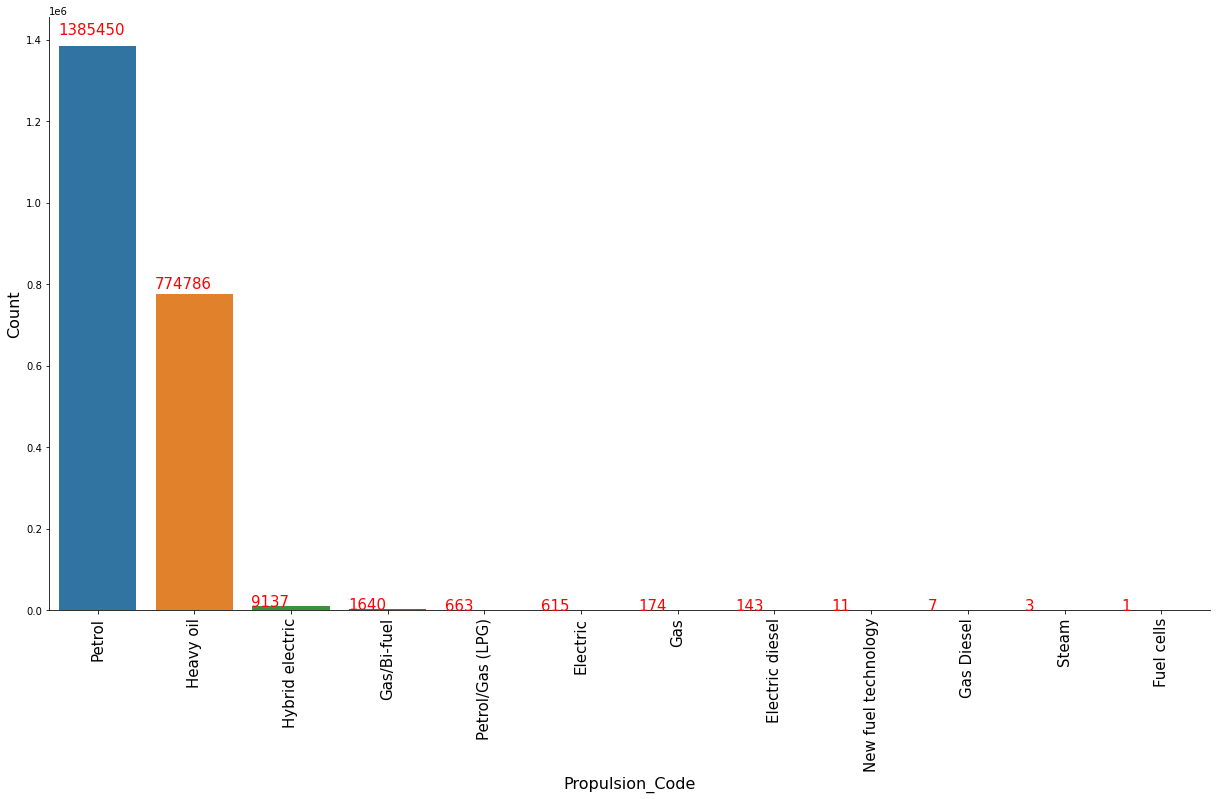

In [38]:

graph = sns.catplot(x ='index' , y ='Propulsion_Code' , data = df_p ,kind = 'bar' , palette = 'tab10')

ax = graph.facet_axis(0,0)

for p in ax.patches:
    ax.text(p.get_x() - 0.01,
           p.get_height()*1.02,
           '{}'.format(int(p.get_height())),
            color = 'red',
            rotation = 'horizontal',
            size =15)


  
graph.set_axis_labels('Propulsion_Code','Count', fontsize = 16)
graph.set_xticklabels(fontsize=15,rotation=90)
graph.fig.set_figwidth(20)
graph.fig.set_figheight(10)

plt.show()

Observations:
- Most of the vehicles involeved in accidents are of petrol fuel followed by heavy oil. 

### Area of driver by accident Index 

In [39]:
df_area = pd.DataFrame(df_new.groupby(['Driver_Home_Area_Type','Sex_of_Driver'])['Accident_Index'].nunique())
df_area.reset_index(level =[0,1], inplace = True)
df_area

,Driver_Home_Area_Type,Sex_of_Driver,Accident_Index
0,Rural,Female,78835
1,Rural,Male,140337
2,Rural,Not known,810
3,Small town,Female,56556
4,Small town,Male,109618
5,Small town,Not known,604
6,Urban area,Female,445203
7,Urban area,Male,972589
8,Urban area,Not known,67265


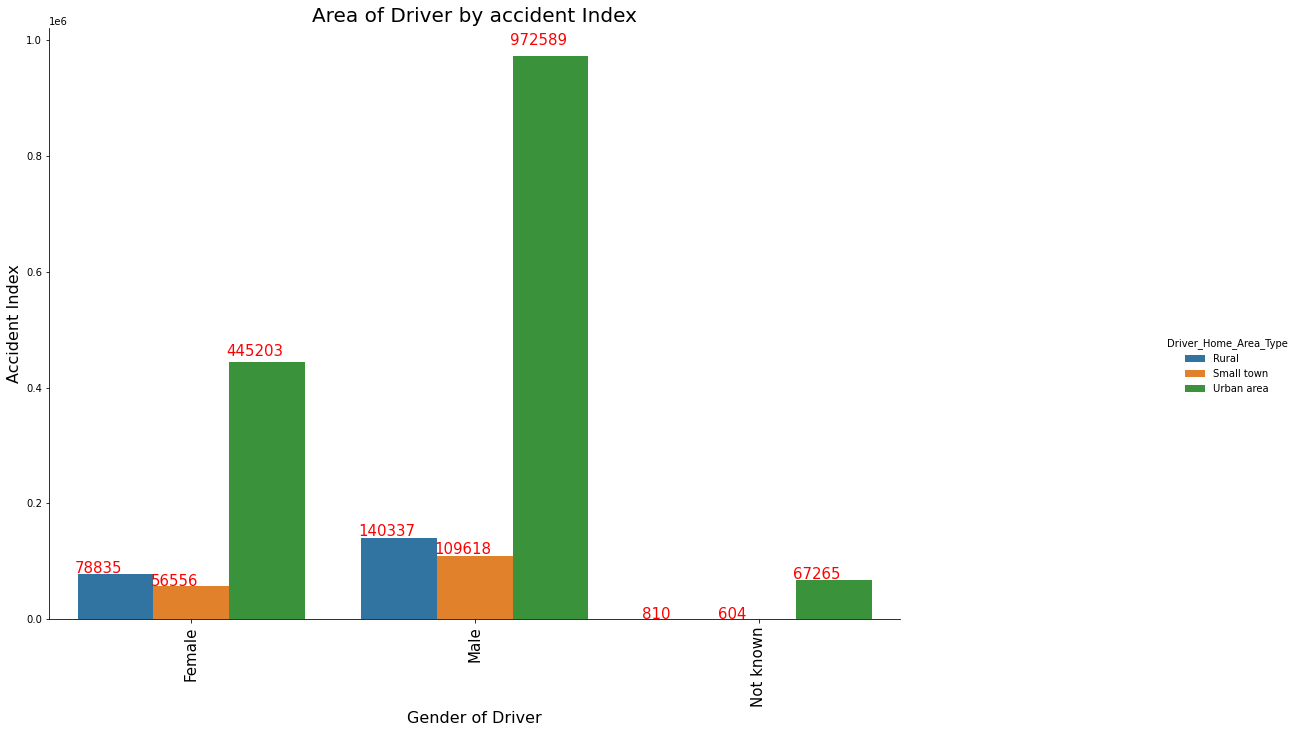

In [40]:

graph = sns.catplot(x ='Sex_of_Driver' , y ='Accident_Index' , hue ='Driver_Home_Area_Type', data = df_area ,kind = 'bar' , palette = 'tab10')

ax = graph.facet_axis(0,0)

for p in ax.patches:
    ax.text(p.get_x() - 0.01,
           p.get_height()*1.02,
           '{}'.format(int(p.get_height())),
            color = 'red',
            rotation = 'horizontal',
            size =15)


graph.set_axis_labels('')    
graph.set_axis_labels("Gender of Driver","Accident Index", fontsize = 16)
graph.set_xticklabels(fontsize=15,rotation=90)
graph.fig.set_figwidth(20)
graph.fig.set_figheight(10)

plt.title("Area of Driver by accident Index",fontsize=20)
plt.show()

Observations:
 - Drivers involved in accidents are of from urbaa area and most of them are male drivers . 

<AxesSubplot:>

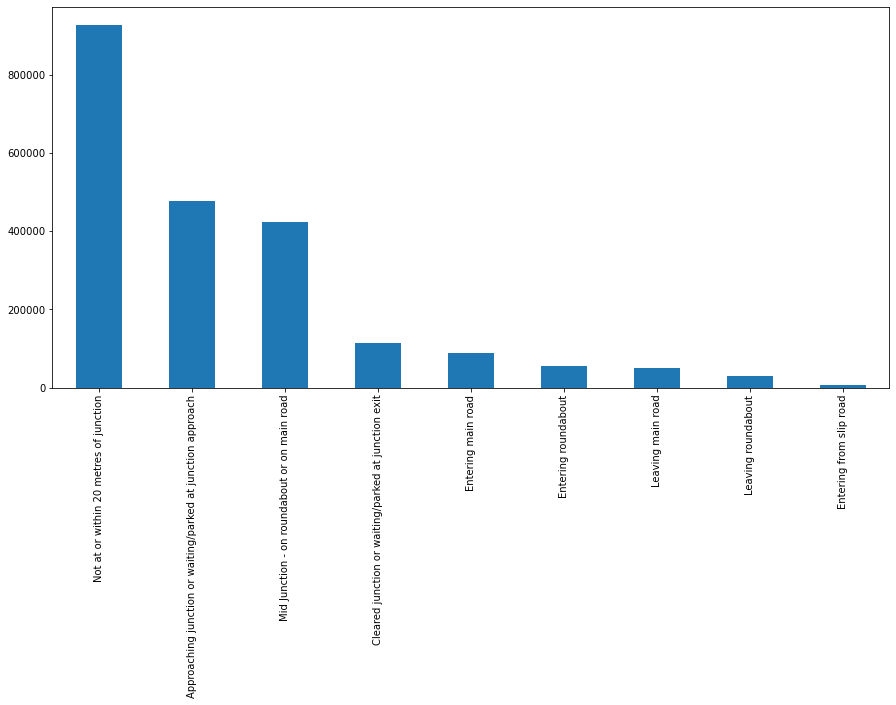

In [41]:
fig = plt.figure(figsize=[15,7])
df_new['Junction_Location'].value_counts().plot(kind ='bar')

In [42]:
df_new['X1st_Point_of_Impact'].value_counts()

Front             1059506
Back               410596
Offside            304899
Nearside           273641
Did not impact     123988
Name: X1st_Point_of_Impact, dtype: int64

In [43]:
df_new['Journey_Purpose_of_Driver'].value_counts()

Not known                      964128
Other/Not known (2005-10)      555584
Journey as part of work        391520
Commuting to/from work         202439
Other                           32889
Taking pupil to/from school     21774
Pupil riding to/from school      4296
Name: Journey_Purpose_of_Driver, dtype: int64

In [44]:
df_new['Engine_Capacity_.CC.'].value_counts()

1598.0    370937
1997.0     58349
1998.0     56999
1242.0     55214
1896.0     51122
           ...  
1982.0         1
9464.0         1
3233.0         1
4056.0         1
2632.0         1
Name: Engine_Capacity_.CC., Length: 2553, dtype: int64

## Conclusion

- There are **2172630 observations** with **38 features** in Vehicle dataset . 
- The number of vehicles involved in accidents is continuously rising each year from 2004 to 2016.
- From the above analysis we can observe that , arround 70% of vehicles involved in accidents are CAR.
- The vehicles involeved in accident are of petrol fuel type and arround 40% of vehicles involved are of VAUXHALL,FORD and PEUGEOT followed by Renault ,PEUGEOT,VOLKSWAGEN.
- Most of the drivers involved in accident are male and are from urban area . 
- new vehicles aged near 7 are more likely to be in collisions compaire to Older aged vehicles. whereas older aged vehicles  are less likely to be involved in collisions.
- Most of the drivers involeved in accident are from age group of 26 to 35 years and most of them are male .